In [ ]:
!pip install statsbombpy
!pip install mplsoccer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 719.2 kB/s eta 0:00:00


In [ ]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
import numpy as np

#call statsbombpy API to get all free competitions
free_comps = sb.competitions()

#print a list of free competitions
a  = free_comps[free_comps['competition_name']=='Ligue 1']
a = a[a["season_id"]!=27]
a

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
58,7,235,France,Ligue 1,male,False,False,2022/2023,2024-06-11T00:50:53.277411,2024-06-26T08:17:36.043856,2024-06-26T08:17:36.043856,2024-06-11T00:50:53.277411
59,7,108,France,Ligue 1,male,False,False,2021/2022,2024-06-03T16:46:00.665854,2024-06-03T16:49:55.355195,2024-06-03T16:49:55.355195,2024-06-03T16:46:00.665854


In [ ]:
free_comps = sb.competitions()
free_comps[(free_comps["competition_name"]=="Premier League") & (free_comps["season_id"]==27)]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
64,2,27,England,Premier League,male,False,False,2015/2016,2024-06-12T07:43:56.243851,2021-06-13T16:17:31.694,None,2024-06-12T07:43:56.243851


In [ ]:
leiscester_pl = sb.matches(competition_id=2, season_id=27)
leiscester_pl

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3754058,2016-01-02,16:00:00.000,England - Premier League,2015/2016,Leicester City,AFC Bournemouth,0,0,available,...,2021-06-12T16:17:31.694,20,Regular Season,King Power Stadium,Andre Marriner,Claudio Ranieri,Eddie Howe,1.1.0,2,2
1,3754245,2015-10-17,16:00:00.000,England - Premier League,2015/2016,West Bromwich Albion,Sunderland,1,0,available,...,2021-06-13T16:17:31.694,9,Regular Season,The Hawthorns,Martin Atkinson,Tony Pulis,Sam Allardyce,1.1.0,2,2
2,3754136,2015-12-19,18:30:00.000,England - Premier League,2015/2016,Newcastle United,Aston Villa,1,1,available,...,2021-06-13T16:17:31.694,17,Regular Season,St. James'' Park,Martin Atkinson,Steve McClaren,Rémi Garde,1.1.0,2,2
3,3754037,2016-04-30,16:00:00.000,England - Premier League,2015/2016,Everton,AFC Bournemouth,2,1,available,...,2021-06-12T16:17:31.694,36,Regular Season,Goodison Park,Neil Swarbrick,Roberto Martínez Montoliú,Eddie Howe,1.1.0,2,2
4,3754039,2016-02-13,16:00:00.000,England - Premier League,2015/2016,Crystal Palace,Watford,1,2,available,...,2021-06-12T16:17:31.694,26,Regular Season,Selhurst Park,Robert Madley,Alan Pardew,Enrique Sánchez Flores,1.1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,2015-08-17,21:00:00.000,England - Premier League,2015/2016,Liverpool,AFC Bournemouth,1,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Anfield,Craig Pawson,Brendan Rodgers,Eddie Howe,1.1.0,2,2
376,3754267,2015-08-15,16:00:00.000,England - Premier League,2015/2016,Watford,West Bromwich Albion,0,0,available,...,2021-06-13T16:17:31.694,2,Regular Season,Vicarage Road,Paul Tierney,Enrique Sánchez Flores,Tony Pulis,1.1.0,2,2
377,3754141,2015-08-09,14:30:00.000,England - Premier League,2015/2016,Arsenal,West Ham United,0,2,available,...,2021-06-13T16:17:31.694,1,Regular Season,Emirates Stadium,Martin Atkinson,Arsène Wenger,Slaven Bilić,1.1.0,2,2
378,3754128,2015-08-08,16:00:00.000,England - Premier League,2015/2016,AFC Bournemouth,Aston Villa,0,1,available,...,2021-06-13T16:17:31.694,1,Regular Season,Vitality Stadium,Mark Clattenburg,Eddie Howe,Tim Sherwood,1.1.0,2,2


In [ ]:
events_df = sb.events(match_id=3754141) # Arsenal VS West Ham
events_df

,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_other,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Arsenal,1,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",West Ham United,40,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:24:05.973,Injury Stoppage,NaN
3560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Arsenal,1,00:29:07.702,Injury Stoppage,NaN
3561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:29:08.132,Injury Stoppage,NaN
3562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,West Ham United,40,00:24:52.579,Player Off,NaN


Index(['ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_other',
       'clearance_right_foot', 'counterpress', 'dribble_outcome',
       'dribble_overrun', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
  

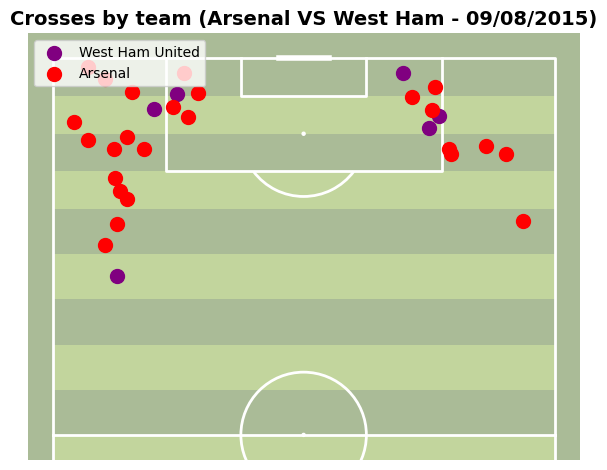

In [ ]:
print(events_df.columns)

# Assign colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for passes identified as crosses
pass_crosses = events_df[events_df['pass_cross'].notna()]

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb',pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot crosses for each team
teams = pass_crosses['team'].unique()
for team in teams:
    if team in team_colors:
        color = team_colors[team]  # Use the assigned color
    else:
        color = 'gray'  # Default color if team isn't specified

    # Filter the data for the current team
    team_crosses = pass_crosses[pass_crosses['team'] == team]
    pass_start_locations = team_crosses['location'].dropna()

    for loc in pass_start_locations:
        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, label=team, s=100)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=10)
plt.title('Crosses by team (Arsenal VS West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.show()


In [ ]:
for team in events_df["team"].unique():
  a = events_df[events_df["team"]==team]
  print(f"{team}: {round(a['shot_statsbomb_xg'].sum(), 2)}xG")

Arsenal: 1.29xG
West Ham United: 0.43xG


Damn... Arsenal lost 2-0

Looking at the number of crosses is also pretty impressive. West Ham only had 6 vs Arsenal's 20+

Thats an impressive underperformance of **-1.29** versus a West Ham being much more convincing at a **+1.57** realized vs expected goals


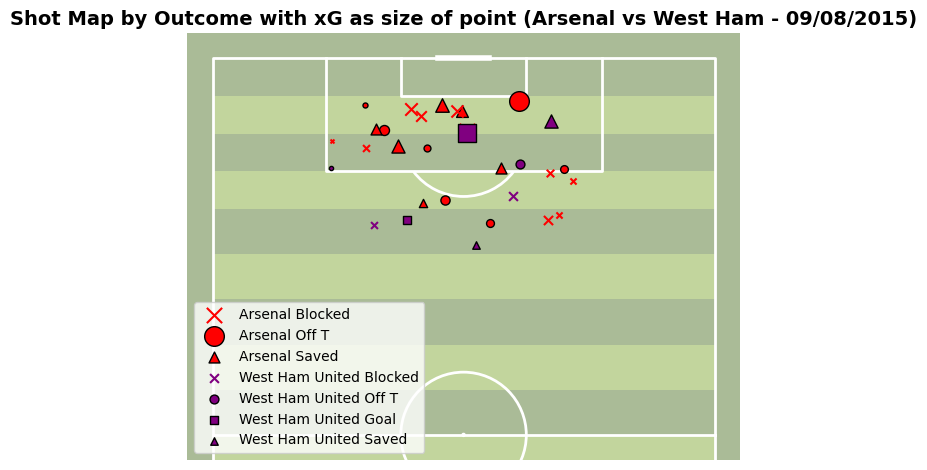

In [ ]:
# Define colors for Arsenal and West Ham
team_colors = {
    'Arsenal': 'red',
    'West Ham United': 'purple'
}

# Filter for shots
shots = events_df[events_df['type'] == 'Shot']

# Initialize the pitch
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#aabb97', line_color='white',
                      stripe_color='#c2d59d', stripe=True, half=True)
fig, ax = pitch.draw()

# Plot shots for each team
for team, color in team_colors.items():
    team_shots = shots[shots['team'] == team]
    for _, shot in team_shots.iterrows():
        loc = shot['location']
        xg = shot['shot_statsbomb_xg']
        shot_outcome = shot['shot_outcome']
        # Determine marker based on shot outcome
        if shot_outcome == 'Goal':
            marker = 's'  # Square for goals
        elif shot_outcome == 'Saved':
            marker = '^'  # Triangle for on-target
        elif shot_outcome == 'Blocked':
            marker = 'x'  # Triangle for on-target
        else:
            marker = 'o'  # Circle for off-target

        if isinstance(loc, list) and len(loc) == 2:
            pitch.scatter(loc[0], loc[1], ax=ax, color=color, edgecolor='black',
                          s=xg * 1000, label=f'{team} {shot_outcome}', marker=marker)

# Add legend and title
handles, labels = ax.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Remove duplicates
ax.legend(unique_labels.values(), unique_labels.keys(), loc='lower left', fontsize=10)
plt.title('Shot Map by Outcome with xG as size of point (Arsenal vs West Ham - 09/08/2015)', fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


In [ ]:
def get_possession(match_df: pd.DataFrame) -> list:
  # sb_event_df = sb.events(match_id=match_id)
  home = 0
  away = 0
  return [home, away]

def get_home_away_xg(match_df: pd.DataFrame) -> list:
  t = []
  for team in match_df["team"].unique():
    a = match_df[match_df["team"]==team]
    t.append(a['shot_statsbomb_xg'].sum())
  return t

In [ ]:
df = pd.DataFrame()
df["match_id"], df["home"], df["away"], df["match_week"], df["home_score"], df["away_score"] = leiscester_pl["match_id"], leiscester_pl["home_team"], leiscester_pl["away_team"], leiscester_pl["match_week"], leiscester_pl["home_score"], leiscester_pl["away_score"]

for match_id in df["match_id"]:
  print(match_id)
  match_event_df = sb.events(match_id=match_id)

  home_xg, away_xg = get_home_away_xg(match_df=match_event_df)

  print(f"home: {home_xg}, away: {away_xg}")

  df.loc[df["match_id"]==match_id, "home_xg"] = home_xg
  df.loc[df["match_id"]==match_id, "away_xg"] = away_xg

df

3754058
home: 2.822870534, away: 0.9365025570000001
3754245
home: 1.4764541943, away: 0.670350703
3754136
home: 1.085260928, away: 0.380227848
3754037
home: 0.890678305, away: 1.429666863
3754039
home: 1.142375225, away: 1.703768405
3754041
home: 2.922745433, away: 0.301121908
3754042
home: 1.6083169380000002, away: 0.5253348335
3754043
home: 1.5332255784000002, away: 0.25445065
3754045
home: 0.88816437, away: 1.6955960014999998
3754048
home: 2.66542692, away: 0.5921424275
3754049
home: 1.9985859039999998, away: 0.6380323042
3754050
home: 1.0557286609999998, away: 1.1187673422
3754052
home: 0.458485052, away: 0.697672533
3754053
home: 1.1835343155, away: 2.131559391
3754055
home: 2.4303121234, away: 0.7353494558
3754226
home: 0.535956585, away: 1.7905645047000003
3754014
home: 1.0752312229999998, away: 1.2773736449000002
3754091
home: 0.4492997149, away: 0.975737208
3754135
home: 1.5285599140000001, away: 0.4798927317
3754293
home: 0.7469116069999999, away: 0.8532972239999999
3754339
h

,match_id,home,away,match_week,home_score,away_score,home_xg,away_xg
0,3754058,Leicester City,AFC Bournemouth,20,0,0,2.822871,0.936503
1,3754245,West Bromwich Albion,Sunderland,9,1,0,1.476454,0.670351
2,3754136,Newcastle United,Aston Villa,17,1,1,1.085261,0.380228
3,3754037,Everton,AFC Bournemouth,36,2,1,0.890678,1.429667
4,3754039,Crystal Palace,Watford,26,1,2,1.142375,1.703768
...,...,...,...,...,...,...,...,...
375,3754020,Liverpool,AFC Bournemouth,2,1,0,1.833528,0.789176
376,3754267,Watford,West Bromwich Albion,2,0,0,0.900475,0.931386
377,3754141,Arsenal,West Ham United,1,0,2,1.291578,0.429877
378,3754128,AFC Bournemouth,Aston Villa,1,0,1,1.249248,0.651935


In [ ]:
leiscester_pl[leiscester_pl["match_id"] == 3754204]

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
116,3754204,2015-08-29,16:00:00.000,England - Premier League,2015/2016,Aston Villa,Sunderland,2,2,available,...,2021-06-13T16:17:31.694,4,Regular Season,Villa Park,Robert Madley,Tim Sherwood,Dick Advocaat,1.1.0,2,2


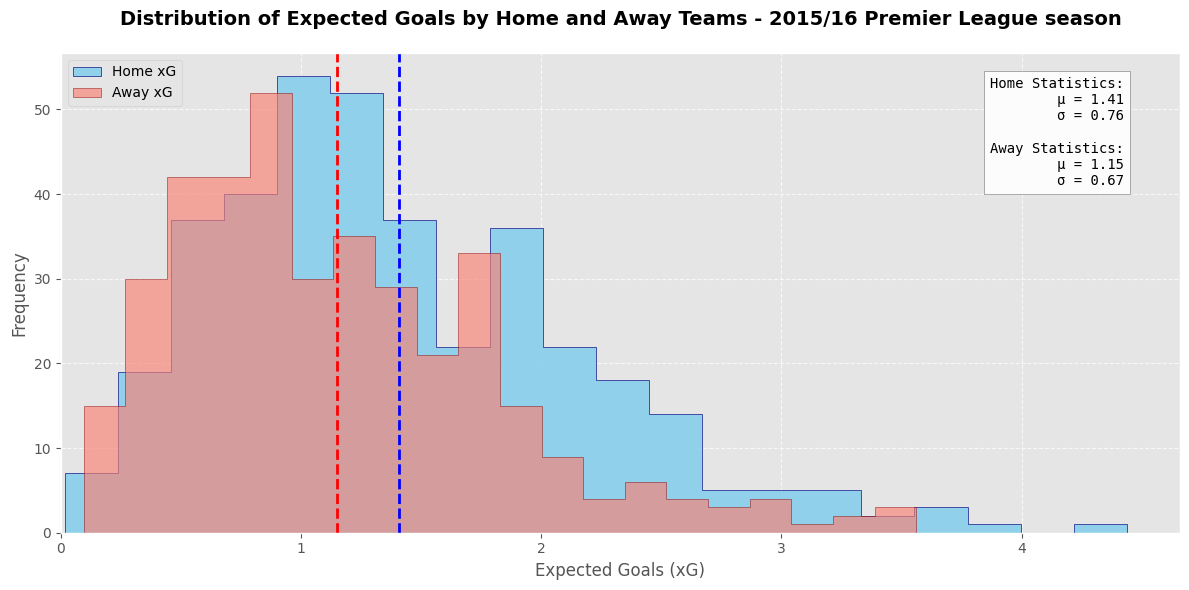

In [ ]:
# Calculate statistics
home_mean = df["home_xg"].mean()
home_std = df["home_xg"].std()
away_mean = df["away_xg"].mean()
away_std = df["away_xg"].std()

# Set style and figure size
plt.style.use('ggplot')  # Alternatives: 'bmh', 'seaborn-colorblind', 'fivethirtyeight'
plt.figure(figsize=(12, 6))

# Create histograms with custom parameters
plt.hist(df["home_xg"], bins=20, color='skyblue', edgecolor='navy',
         alpha=0.9, label='Home xG', density=False, histtype='stepfilled')
plt.hist(df["away_xg"], bins=20, color='salmon', edgecolor='darkred',
         alpha=0.65, label='Away xG', density=False, histtype='stepfilled')

# Add vertical lines for means
plt.axvline(home_mean, color='blue', linestyle='--', linewidth=2)
plt.axvline(away_mean, color='red', linestyle='--', linewidth=2)

# Create statistical annotation box
stats_text = (f'Home Statistics:\nμ = {home_mean:.2f}\nσ = {home_std:.2f}\n\n'
              f'Away Statistics:\nμ = {away_mean:.2f}\nσ = {away_std:.2f}')

plt.gca().text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
               fontsize=10, fontfamily='monospace',
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Add labels and title
plt.xlabel('Expected Goals (xG)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Expected Goals by Home and Away Teams - 2015/16 Premier League season', fontsize=14, pad=20, fontweight="bold")

# Add legend and grid
plt.legend(loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Set axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

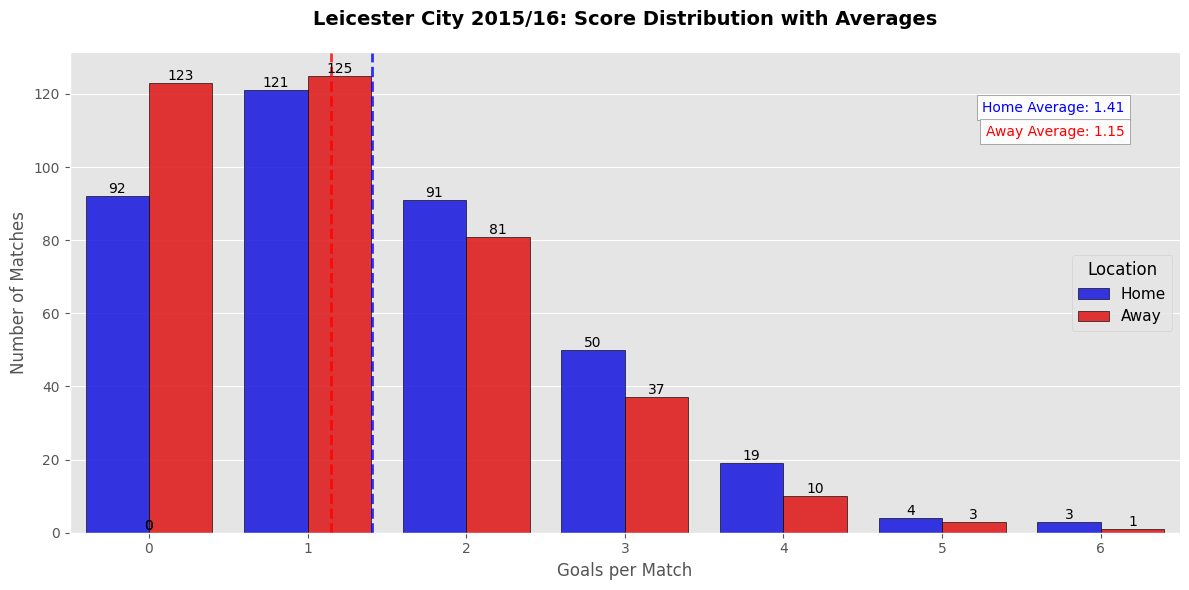

In [ ]:
# Updated colors
home_color = 'blue'
away_color = 'red'

score_df = leiscester_pl.melt(value_vars=['home_score', 'away_score'],
                             var_name='location', value_name='goals')
score_df['location'] = score_df['location'].str.replace('_score', '').str.title()

# Create plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=score_df, x='goals', hue='location',
                   palette=[home_color, away_color],
                   alpha=0.9, edgecolor='black')

# Add mean lines
plt.axvline(home_mean, color=home_color, linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(away_mean, color=away_color, linestyle='--', linewidth=2, alpha=0.8)

# Add mean annotations
plt.text(0.95, 0.90, f'Home Average: {home_mean:.2f}',
         color=home_color, transform=ax.transAxes,
         ha='right', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))
plt.text(0.95, 0.85, f'Away Average: {away_mean:.2f}',
         color=away_color, transform=ax.transAxes,
         ha='right', va='top', fontsize=10,
         bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

# Style elements
plt.title('Leicester City 2015/16: Score Distribution with Averages',
          pad=20, fontsize=14, fontweight='bold')
plt.xlabel('Goals per Match', fontsize=12)
plt.ylabel('Number of Matches', fontsize=12)
plt.legend(title='Location', title_fontsize=12, fontsize=11)
sns.despine()
plt.tight_layout()
plt.show()


Good, the plots above tell us that considering two teams of same level, a team is expected to win more at home than it would on the road. The expected goal seen that season is **1.41** at home VS **1.15** when playing away from home.

This number is quite close from the realized number over a full season (1.49 home goals VS 1.21 away goals / game).

The standard deviation is also significant. There is a wider range of goals scored at home than away.

However it doesn't necessarily mean the team will at home will win more often! There will be another analysis to figure that out later.

Prob of a team not scoring (frequencist approach ignoring all other params): 92 + 123 / (380 x 2) = 215 / 760 ~ 28.3%* (24.2% at home and 32.4% if playing away)

In comparison, this year Ligue 1 (currently at matchday 22) has a much stronger home advantage with **1.61** home goals VS **0.94** away goals.

In [ ]:
teams = leiscester_pl["home_team"].unique()
matchdays = np.sort(leiscester_pl["match_week"].unique())

index = pd.MultiIndex.from_product([matchdays, teams], names=["Matchday", "Team"])
columns = ["Goals Scored", "Goals Conceded", "Wins", "Draws", "Losses"]

# Creating empty tables
table = pd.DataFrame(0, index=index, columns=columns)
table_non_cumulative = pd.DataFrame(0, index=index, columns=columns)

for matchday in matchdays:
    temp = leiscester_pl[leiscester_pl["match_week"] == matchday]

    for team in temp["home_team"].unique():
        home_goals = temp.loc[temp["home_team"] == team, "home_score"].iloc[0]
        away_goals = temp.loc[temp["home_team"] == team, "away_score"].iloc[0]

        table_non_cumulative.at[(matchday, team), "Goals Scored"] = home_goals
        table_non_cumulative.at[(matchday, team), "Goals Conceded"] = away_goals

        if home_goals > away_goals:
            table_non_cumulative.at[(matchday, team), "Wins"] = 1
        elif home_goals < away_goals:
            table_non_cumulative.at[(matchday, team), "Losses"] = 1
        else:
            table_non_cumulative.at[(matchday, team), "Draws"] = 1

    for team in temp["away_team"].unique():
        home_goals = temp.loc[temp["away_team"] == team, "home_score"].iloc[0]
        away_goals = temp.loc[temp["away_team"] == team, "away_score"].iloc[0]

        table_non_cumulative.at[(matchday, team), "Goals Scored"] = away_goals
        table_non_cumulative.at[(matchday, team), "Goals Conceded"] = home_goals

        if away_goals > home_goals:
            table_non_cumulative.at[(matchday, team), "Wins"] = 1
        elif home_goals > away_goals:
            table_non_cumulative.at[(matchday, team), "Losses"] = 1
        else:
            table_non_cumulative.at[(matchday, team), "Draws"] = 1

# Cumulative table


table[["Goals Scored", "Goals Conceded", "Wins", "Draws", "Losses"]] = table_non_cumulative.groupby(level="Team").cumsum()
table["Points"] = table["Wins"] * 3 + table["Draws"]
table_non_cumulative["Points"] = table_non_cumulative["Wins"] * 3 + table_non_cumulative["Draws"]

In [ ]:
table

Goals Scored  Goals Conceded  Wins  Draws  \
Matchday Team                                                              
1        Leicester City                   4               2     1      0   
         West Bromwich Albion             0               3     0      0   
         Newcastle United                 2               2     0      1   
         Everton                          2               2     0      1   
         Crystal Palace                   3               1     1      0   
...                                     ...             ...   ...    ...   
38       Norwich City                    39              67     9      7   
         Chelsea                         59              53    12     14   
         Watford                         40              50    12      9   
         Manchester City                 71              41    19      9   
         West Ham United                 65              51    16     14   

                               Losses  Points  
Matchday Team                                  
1        Leicester City             0       3  
         West Bromwich Albion       1       0  
         Newcastle United           0       1  
         Everton                    0       1  
         Crystal Palace             0       3  
...                               ...     ...  
38       Norwich City              22      34  
         Chelsea                   12      50  
         Watford                   17      45  
         Manchester City           10      66  
         West Ham United            8      62  

[760 rows x 6 columns]

In [ ]:
table_non_cumulative

Goals Scored  Goals Conceded  Wins  Draws  \
Matchday Team                                                              
1        Leicester City                   4               2     1      0   
         West Bromwich Albion             0               3     0      0   
         Newcastle United                 2               2     0      1   
         Everton                          2               2     0      1   
         Crystal Palace                   3               1     1      0   
...                                     ...             ...   ...    ...   
38       Norwich City                     0               3     0      0   
         Chelsea                          1               1     0      1   
         Watford                          2               2     0      1   
         Manchester City                  1               1     0      1   
         West Ham United                  1               2     0      0   

                               Losses  Points  
Matchday Team                                  
1        Leicester City             0       3  
         West Bromwich Albion       1       0  
         Newcastle United           0       1  
         Everton                    0       1  
         Crystal Palace             0       3  
...                               ...     ...  
38       Norwich City               1       0  
         Chelsea                    0       1  
         Watford                    0       1  
         Manchester City            0       1  
         West Ham United            1       0  

[760 rows x 6 columns]

In [ ]:
# Create a points per game index and a points per game in last 5games

# Points per game season


df["home_ppg"] = 0
df["away_ppg"] = 0
df["home_ppg_5"] = 0
df["away_ppg_5"] = 0
df["home_scored_pg"] = 0
df["home_conceeded_pg"] = 0
df["away_scored_pg"] = 0
df["away_conceeded_pg"] = 0



for _, row in df.iterrows():
  matchweek = row["match_week"] - 1
  home_team = row["home"]
  away_team = row["away"]
  match_id = row["match_id"]

  # make points 0 if matchweek is 1
  if matchweek == 0:
    home_team_points = 0
    away_team_points = 0

  else:
    home_team_points = table.loc[matchweek, home_team]["Points"] # points before the game
    away_team_points = table.loc[matchweek, away_team]["Points"]

    home_team_scored = table.loc[matchweek, home_team]["Goals Scored"] # checking table to see avg goals scored / conceeded per game
    home_team_conceeded = table.loc[matchweek, home_team]["Goals Conceded"]
    away_team_scored = table.loc[matchweek, away_team]["Goals Scored"]
    away_team_conceeded = table.loc[matchweek, away_team]["Goals Conceded"]


    df.loc[df["match_id"]==match_id, "home_scored_pg"] = home_team_scored/matchweek
    df.loc[df["match_id"]==match_id, "home_conceeded_pg"] = home_team_conceeded/matchweek
    df.loc[df["match_id"]==match_id, "away_scored_pg"] = away_team_scored/matchweek
    df.loc[df["match_id"]==match_id, "away_conceeded_pg"] = away_team_conceeded/matchweek


  print(f"Matchday {row['match_week']} ")
  print(f"Home: {home_team}: {row['home_score']} - Away: {away_team}  {row['away_score']}")

  print(f"{home_team}: {home_team_points} points")
  print(f"{away_team}: {away_team_points} points \n")

  if matchweek > 0:
    df.loc[df["match_id"]==match_id, "home_ppg"] = home_team_points/matchweek
    df.loc[df["match_id"]==match_id, "away_ppg"] = away_team_points/matchweek

    if matchweek <= 5:
      df.loc[df["match_id"]==match_id, "home_ppg_5"] = home_team_points/matchweek
      df.loc[df["match_id"]==match_id, "away_ppg_5"] = away_team_points/matchweek


  if matchweek > 5:

    home_team_points_5 = 0
    away_team_points_5 = 0

    for i in range(0,5):
      home_team_points_5 += table_non_cumulative.loc[matchweek-i, home_team]["Points"]
      away_team_points_5 += table_non_cumulative.loc[matchweek-i, away_team]["Points"]

    df.loc[df["match_id"]==match_id, f"home_ppg_5"] = home_team_points_5/5
    df.loc[df["match_id"]==match_id, f"away_ppg_5"] = away_team_points_5/5




<ipython-input-17-2b8509876716>:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9473684210526316' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["match_id"]==match_id, "home_scored_pg"] = home_team_scored/matchweek
<ipython-input-17-2b8509876716>:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3157894736842106' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["match_id"]==match_id, "home_conceeded_pg"] = home_team_conceeded/matchweek
<ipython-input-17-2b8509876716>:40: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1578947368421053' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df["m

Matchday 20 
Home: Leicester City: 0 - Away: AFC Bournemouth  0
Leicester City: 39 points
AFC Bournemouth: 20 points 

Matchday 9 
Home: West Bromwich Albion: 1 - Away: Sunderland  0
West Bromwich Albion: 8 points
Sunderland: 3 points 

Matchday 17 
Home: Newcastle United: 1 - Away: Aston Villa  1
Newcastle United: 16 points
Aston Villa: 6 points 

Matchday 36 
Home: Everton: 2 - Away: AFC Bournemouth  1
Everton: 41 points
AFC Bournemouth: 41 points 

Matchday 26 
Home: Crystal Palace: 1 - Away: Watford  2
Crystal Palace: 32 points
Watford: 33 points 

Matchday 38 
Home: Arsenal: 4 - Away: Aston Villa  0
Arsenal: 68 points
Aston Villa: 17 points 

Matchday 38 
Home: West Bromwich Albion: 1 - Away: Liverpool  1
West Bromwich Albion: 42 points
Liverpool: 59 points 

Matchday 31 
Home: Tottenham Hotspur: 3 - Away: AFC Bournemouth  0
Tottenham Hotspur: 58 points
AFC Bournemouth: 38 points 

Matchday 19 
Home: Leicester City: 0 - Away: Manchester City  0
Leicester City: 38 points
Manchester

In [ ]:
df

,match_id,home,away,match_week,home_score,away_score,home_xg,away_xg,home_ppg,away_ppg,home_ppg_5,away_ppg_5,home_scored_pg,home_conceeded_pg,away_scored_pg,away_conceeded_pg
0,3754058,Leicester City,AFC Bournemouth,20,0,0,2.822871,0.936503,2.052632,1.052632,2.0,2.0,1.947368,1.315789,1.157895,1.789474
1,3754245,West Bromwich Albion,Sunderland,9,1,0,1.476454,0.670351,1.000000,0.375000,1.4,0.4,0.750000,1.375000,1.000000,2.250000
2,3754136,Newcastle United,Aston Villa,17,1,1,1.085261,0.380228,1.000000,0.375000,1.8,0.4,1.125000,1.937500,0.812500,1.875000
3,3754037,Everton,AFC Bournemouth,36,2,1,0.890678,1.429667,1.171429,1.171429,0.6,0.6,1.514286,1.457143,1.200000,1.742857
4,3754039,Crystal Palace,Watford,26,1,2,1.142375,1.703768,1.280000,1.320000,0.2,0.8,1.040000,1.200000,1.080000,1.080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,Liverpool,AFC Bournemouth,2,1,0,1.833528,0.789176,3.000000,0.000000,3.0,0.0,1.000000,0.000000,0.000000,1.000000
376,3754267,Watford,West Bromwich Albion,2,0,0,0.900475,0.931386,1.000000,0.000000,1.0,0.0,2.000000,2.000000,0.000000,3.000000
377,3754141,Arsenal,West Ham United,1,0,2,1.291578,0.429877,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
378,3754128,AFC Bournemouth,Aston Villa,1,0,1,1.249248,0.651935,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [ ]:
# coding target feature

df["HOME_WIN"] = np.where(df["home_score"] > df["away_score"], 1, 0)


In [ ]:
ml_df = df.copy()
# ml_df = ml_df.drop(columns=["home_score", "away_score"])
ml_df

,match_id,home,away,match_week,home_score,away_score,home_xg,away_xg,home_ppg,away_ppg,home_ppg_5,away_ppg_5,home_scored_pg,home_conceeded_pg,away_scored_pg,away_conceeded_pg,HOME_WIN
0,3754058,Leicester City,AFC Bournemouth,20,0,0,2.822871,0.936503,2.052632,1.052632,2.0,2.0,1.947368,1.315789,1.157895,1.789474,0
1,3754245,West Bromwich Albion,Sunderland,9,1,0,1.476454,0.670351,1.000000,0.375000,1.4,0.4,0.750000,1.375000,1.000000,2.250000,1
2,3754136,Newcastle United,Aston Villa,17,1,1,1.085261,0.380228,1.000000,0.375000,1.8,0.4,1.125000,1.937500,0.812500,1.875000,0
3,3754037,Everton,AFC Bournemouth,36,2,1,0.890678,1.429667,1.171429,1.171429,0.6,0.6,1.514286,1.457143,1.200000,1.742857,1
4,3754039,Crystal Palace,Watford,26,1,2,1.142375,1.703768,1.280000,1.320000,0.2,0.8,1.040000,1.200000,1.080000,1.080000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,3754020,Liverpool,AFC Bournemouth,2,1,0,1.833528,0.789176,3.000000,0.000000,3.0,0.0,1.000000,0.000000,0.000000,1.000000,1
376,3754267,Watford,West Bromwich Albion,2,0,0,0.900475,0.931386,1.000000,0.000000,1.0,0.0,2.000000,2.000000,0.000000,3.000000,0
377,3754141,Arsenal,West Ham United,1,0,2,1.291578,0.429877,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0
378,3754128,AFC Bournemouth,Aston Villa,1,0,1,1.249248,0.651935,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0


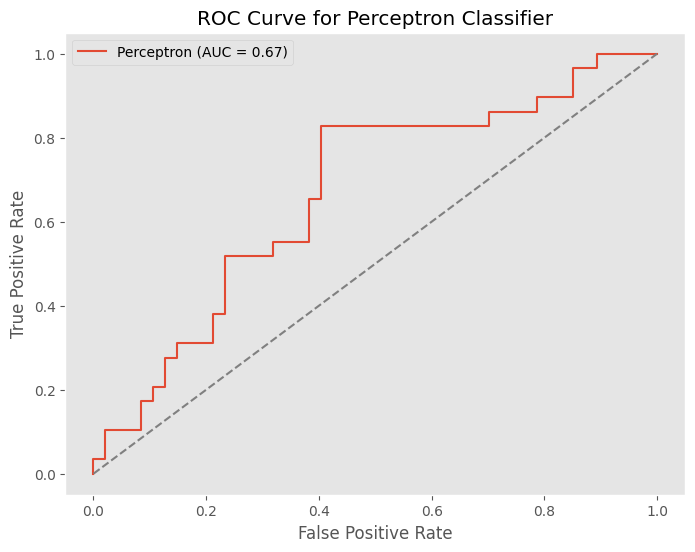

Perceptron Model Accuracy: 0.6579
Perceptron Model AUC: 0.6669


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, roc_curve, auc



# Encoding categorical home and away team names
label_encoder_home = LabelEncoder()
label_encoder_away = LabelEncoder()

ml_df["home_encoded"] = label_encoder_home.fit_transform(ml_df["home"])
ml_df["away_encoded"] = label_encoder_away.fit_transform(ml_df["away"])

# Updating features to include encoded home and away teams
features = ["home_ppg", "away_ppg", "home_ppg_5", "away_ppg_5"]

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(ml_df[features], ml_df["HOME_WIN"], test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Perceptron classifier
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = perceptron.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = perceptron.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"Perceptron Model Accuracy: {accuracy:.4f}")
print(f"Perceptron Model AUC: {roc_auc:.4f}")


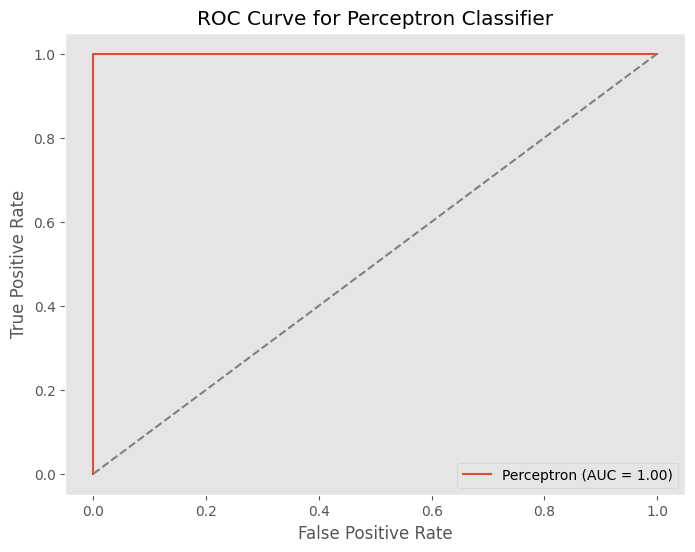

Perceptron Model Accuracy: 1.0000
Perceptron Model AUC: 1.0000


In [ ]:

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training a Perceptron classifier
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = perceptron.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = perceptron.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Perceptron (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Perceptron Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"Perceptron Model Accuracy: {accuracy:.4f}")
print(f"Perceptron Model AUC: {roc_auc:.4f}")


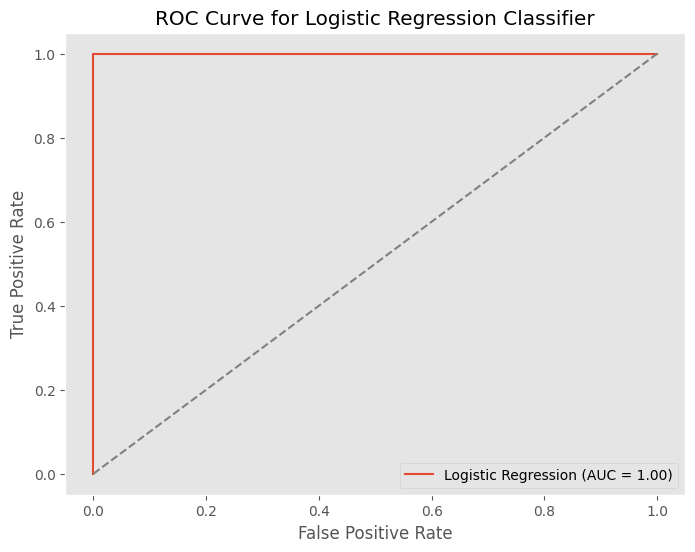

Logistic Regression Model Accuracy: 1.0000
Logistic Regression Model AUC: 1.0000


In [ ]:
from sklearn.linear_model import LogisticRegression


# Training a Logistic Regression classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = log_reg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = log_reg.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"Logistic Regression Model Accuracy: {accuracy:.4f}")
print(f"Logistic Regression Model AUC: {roc_auc:.4f}")

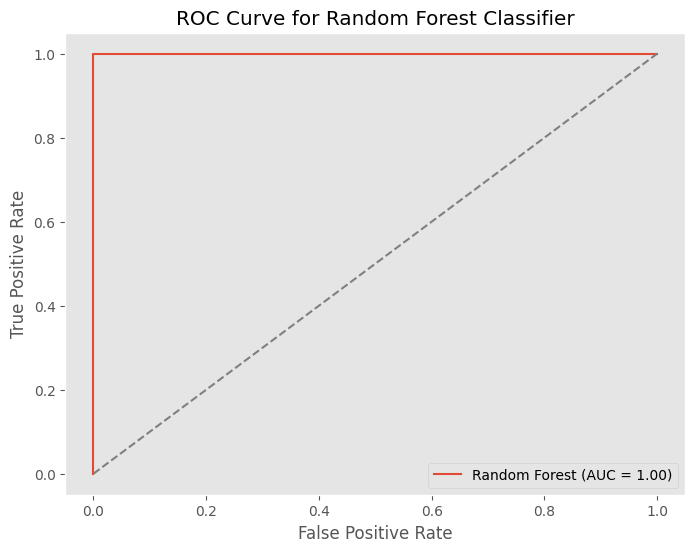

Random Forest Model Accuracy: 1.0000
Random Forest Model AUC: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"Random Forest Model Accuracy: {accuracy:.4f}")
print(f"Random Forest Model AUC: {roc_auc:.4f}")

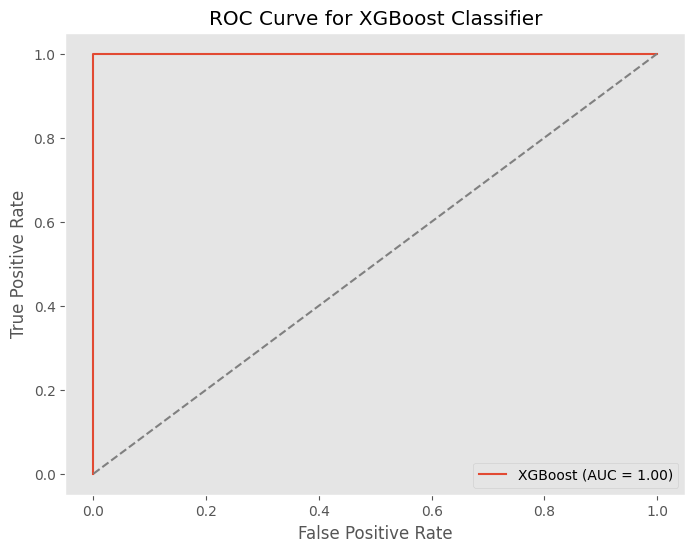

XGBoost Model Accuracy: 1.0000
XGBoost Model AUC: 1.0000


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Training an XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,  # Number of boosting rounds
    max_depth=3,       # Maximum depth of a tree (to prevent overfitting)
    learning_rate=0.1, # Step size shrinkage (to prevent overfitting)
    subsample=0.8,     # Fraction of samples used for training each tree
    colsample_bytree=0.8, # Fraction of features used for training each tree
    objective='binary:logistic',  # For binary classification
    eval_metric='logloss'  # Evaluation metric
)

xgb_clf.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = xgb_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = xgb_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"XGBoost Model Accuracy: {accuracy:.4f}")
print(f"XGBoost Model AUC: {roc_auc:.4f}")

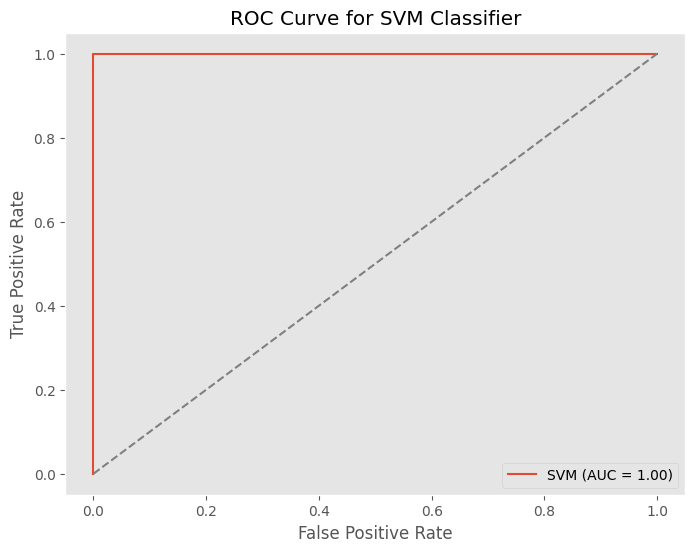

SVM Model Accuracy: 0.9868
SVM Model AUC: 1.0000


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Training an SVM classifier with RBF kernel
svm_clf = SVC(
    kernel='rbf',          # Radial Basis Function kernel
    C=1.0,                # Regularization parameter
    gamma='scale',        # Kernel coefficient (default is 1 / (n_features * X.var()))
    probability=True,     # Enable probability estimates for ROC curve
    random_state=42
)

svm_clf.fit(X_train_scaled, y_train)

# Making predictions and calculating accuracy
y_pred = svm_clf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Computing ROC curve and AUC
y_scores = svm_clf.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend()
plt.grid()
plt.show()

# Output accuracy and AUC
print(f"SVM Model Accuracy: {accuracy:.4f}")
print(f"SVM Model AUC: {roc_auc:.4f}")